# Project: TMDb Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project would analyse a movie dataset colecllected by TMBd. We are particularly interested in the profit generated and the factors closely relates with profitable production. We do not have specific units for most variables of the dataset but we can safely assume that the budget, budget_adj, revenue and revenue_adj are in dollars($).


 Some of the questions we would try to answer include;

* What is the highest and lowest revenue, budget and profit?
* What are the characteristics of profitable movies?
* What are the variable that influences profit?
* What genres of movies are more associated with profitable production?

In [66]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [67]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [68]:
# Check the total number of data enteries in the dataset
df.size

228186

In [69]:
# Check the shape(number of rows and column) of the dataset
df.shape

(10866, 21)

In [70]:
# To see the column number of non-null observations and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [71]:
# To check for number of duplicated rows
df.duplicated().sum()

1

In [72]:
# To see the duplicated row
df[df.duplicated(keep= False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [73]:
# Total number of missing values
df.isnull().sum().sum()

13434

In [74]:
# To check for number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [75]:
# percentage of null values in each column rounded to 4 significant values
df.isnull().mean().round(4) * 100

id                       0.00
imdb_id                  0.09
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
cast                     0.70
homepage                72.98
director                 0.40
tagline                 25.99
keywords                13.74
overview                 0.04
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
dtype: float64

### Report on Data wrangling

The dataset contains 228186 entries in 10866 rows and 21 columns. Within the dataset, 13434 entries are missing of which about 73% are from the homepage column, 26% from the tagline column, 13.74% from the keywords column, 9.5% from the production_companies column and less than 1% from the cast column. The dataset also have a single duplicated row.




### Data Cleaning 

The report from the previous session reveals that our dataset is pretty messy. In order to be able to work with it without issues, we would need to clean it up. The following would be considered neccessary.

* Drop duplicated row
* Drop any column with more than 30% null values
* Drop rows with null values

In [76]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [77]:
# To drop duplicated row
df.drop_duplicates(inplace = True)

In [78]:
# Check to see duplicated row has been droped
df.duplicated().sum()

0

In [79]:
# Drop row with more than 30% null values. The only column that has above 30% null values is homepage column.
df.drop(columns= 'homepage', inplace = True)

In [80]:
# Check to see if homepage has been droped
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [81]:
# Remove unuseful columns
df.drop(columns= ['imdb_id','cast', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], inplace= True)

In [82]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [83]:
# Drop rows with null values
df.dropna(inplace= True)

In [84]:
# Check to see that null values are no more
df.isnull().sum().sum()

0

In [85]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis


###  1. What were the highest and lowest revenue and what movies had them?

In [86]:
df.revenue_adj.min()

0.0

In [87]:
# To takle this question we would be using the revenue_adj column which states the revenue generated for each movie at 2010 after accounting for inflation
max_rev = df.loc[df.revenue_adj == df.revenue_adj.max()]
min_rev = df.loc[df.revenue_adj == df.revenue_adj.min()]

revenue_maxmin = (df.revenue_adj.max(), df.revenue_adj.min())

no_max_rev = max_rev.revenue_adj.count()
no_min_rev = min_rev.revenue_adj.count()
max_min_no = (no_max_rev, no_min_rev)

print(f'The maximum and minimum revenue are:  {revenue_maxmin}')
print(f'The number of movies that generated the maximum and minimun movies are: {max_min_no}')


The maximum and minimum revenue are:  (2827123750.41189, 0.0)
The number of movies that generated the maximum and minimun movies are: (1, 5993)


In [88]:
max_rev

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [89]:
# Looks like we have more than one movie with the lowest revenue so we do head to see the top 5
min_rev.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.932340,30000000,0,Wild Card,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,2.331636,20000000,0,Survivor,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,1.876037,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.000000e+00,0.0


### 2. What movies had the highest and lowest budget ?

In [90]:
# similarly, we would be using the budget_adj for fair comparison
max_min_budg = (df.budget_adj.max(), df.budget_adj.min())

max_budget = df.loc[df.budget_adj == df.budget_adj.max()]
min_budget = df.loc[df.budget_adj == df.budget_adj.min()]


no_maxbudg = max_budget.budget_adj.count()
no_minbudg = min_budget.budget_adj.count()
no_maxmin = (no_maxbudg, no_minbudg)
print(f'The maximum and minimum budget are:  {max_min_budg}')
print(f'The number of movies with the maximum and minimun budgets are: {no_maxmin}')

The maximum and minimum budget are:  (425000000.0, 0.0)
The number of movies with the maximum and minimun budgets are: (1, 5674)


In [91]:
max_budget

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,425000000.0,11087569.0


In [92]:
min_budget.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,103,Mystery|Drama,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,95,Thriller,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,6/12/15,569,7.7,2015,0.0,0.000000e+00


### 3. What movies had the highest and profit and lose?

In [93]:
# Create a column for profit
df['profit_adj'] = df.revenue_adj - df.budget_adj
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [94]:
# Get the most profitable movie and the least profitable movie
most_prof = df.loc[df.profit_adj == df.profit_adj.max()]
most_loss = df.loc[df.profit_adj == df.profit_adj.min()]

prof_loss = pd.concat([most_prof, most_loss], axis = 0)
prof_loss

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,11,12.037933,11000000,775398007,Star Wars,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
2244,46528,0.250540,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08


### 4. How many movies made profit or loss?
We would break out dataset into two groups: profit and loss group, so we can further examine them

In [95]:
# profit group: if revenue is greater than budget
profit_df = df.loc[df.revenue > df.budget]
profit_df.shape

(3773, 14)

In [96]:
# loss group: if budget is greater than revenue
loss_df = df.loc[df.budget > df.revenue]
loss_df.shape

(2386, 14)

In [97]:
df.shape

(10842, 14)

In [98]:
# even group: if revenue is equal to budget
even_df = df.loc[df.revenue == df.budget]
even_df.shape

(4683, 14)

In [99]:
# Create a new column called 'status' to tell whether the movies was profitable, loss or neither(break-even)
profit_df['status'] = 'profit'
loss_df['status'] = 'loss'
even_df['status'] = 'even'
df_v1 = pd.concat([profit_df, loss_df, even_df])
df_v1.head(2)

C:\Users\osazu\AppData\Local\Temp/ipykernel_17772/2824955434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_df['status'] = 'profit'
C:\Users\osazu\AppData\Local\Temp/ipykernel_17772/2824955434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df['status'] = 'loss'
C:\Users\osazu\AppData\Local\Temp/ipykernel_17772/2824955434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,status
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,profit
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,profit


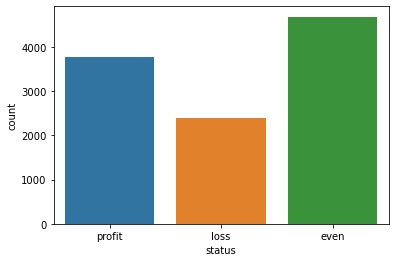

In [100]:
sns.countplot(x ='status', data = df_v1)
plt.show()

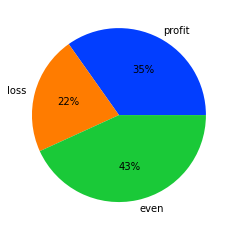

In [101]:
# We display the percentage of profitable production in a pie chart
data = [profit_df.shape[0], loss_df.shape[0], even_df.shape[0]]
keys = ['profit', 'loss','even']
colour = sns.color_palette('bright')
plt.pie(data, colors= colour, labels= keys, autopct='%.0f%%')
plt.show()

In [102]:
# Characteristics of profitable production
profit_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,3773.000000,3773.000000,3.773000e+03,3.773000e+03,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03,3.773000e+03,3.773000e+03
mean,44880.787702,1.167055,2.965395e+07,1.103611e+08,108.313544,521.362841,6.235728,2000.317254,3.505672e+07,1.426683e+08,1.076116e+08
std,73962.792499,1.496812,4.294291e+07,1.778691e+08,21.623980,890.621907,0.781857,12.142373,4.594311e+07,2.173584e+08,1.908259e+08
min,5.000000,0.001117,0.000000e+00,3.000000e+00,26.000000,10.000000,2.100000,1960.000000,0.000000e+00,9.115080e+00,9.360334e-01
25%,6499.000000,0.418255,0.000000e+00,1.422588e+07,95.000000,55.000000,5.700000,1992.000000,0.000000e+00,2.140903e+07,1.049915e+07
50%,11690.000000,0.763430,1.300000e+07,4.801740e+07,105.000000,188.000000,6.300000,2004.000000,1.893003e+07,6.930118e+07,4.175825e+07
75%,42807.000000,1.360827,4.000000e+07,1.290000e+08,118.000000,569.000000,6.800000,2010.000000,4.971213e+07,1.729475e+08,1.199481e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


### 5. What are the factors that affects profit?

<AxesSubplot:xlabel='runtime', ylabel='profit_adj'>

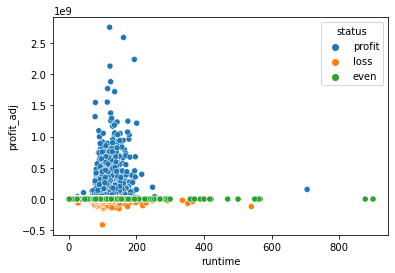

In [103]:
# How does runtime affect profit
sns.scatterplot(data= df_v1, x= df_v1.runtime, y = df_v1.profit_adj, hue= df_v1.status)

<AxesSubplot:xlabel='popularity', ylabel='profit_adj'>

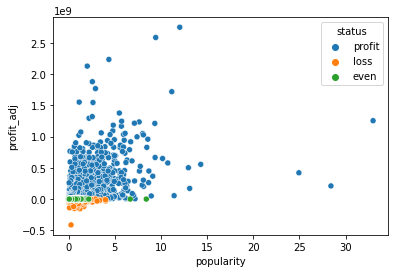

In [104]:
# How does popularity affect profit
sns.scatterplot(data= df_v1, x= df_v1.popularity, y = df_v1.profit_adj,  hue= df_v1.status)

<AxesSubplot:xlabel='budget_adj', ylabel='profit_adj'>

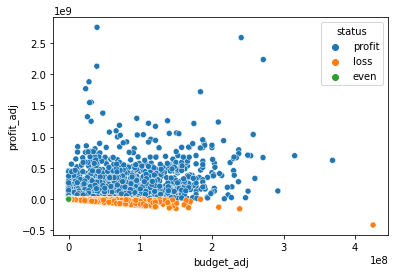

In [105]:
# How does budget affect profit
sns.scatterplot(data= df_v1, x= df_v1.budget_adj, y = df_v1.profit_adj,  hue= df_v1.status)

<AxesSubplot:xlabel='vote_average', ylabel='profit_adj'>

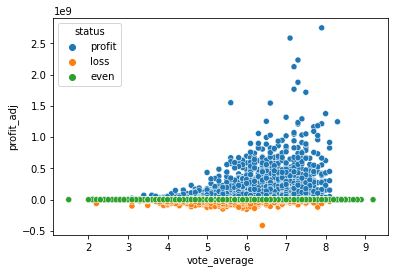

In [106]:
# How does vote_average affect profit
sns.scatterplot(data= df_v1, x= df_v1.vote_average, y = df_v1.profit_adj, hue= df_v1.status)

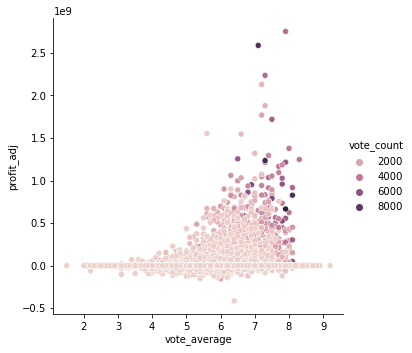

In [107]:
# Relationship between vote_count, vote_average and profit
sns.relplot(data= df_v1, x= df_v1.vote_average, y = df_v1.profit_adj, hue= df_v1.vote_count,)

### 6. What genre are available and which genres are more associated with profitable movies?

In [108]:
# Number of genres combination
df_v1.genres.nunique()

2039

In [109]:
def analyse_genres(data_set):
    data = df_v1.genres
    wordList = []
    for x in data:
        another = x.split('|')
        wordList.append(another)
    #print(wordList)
    unique_dic = {}
    for items in wordList:
        for item in items:
            if item in unique_dic:
                unique_dic[item] +=1
            else:
                unique_dic[item] = 1
    dts = pd.Series(data = unique_dic)
    return dts

In [110]:
available_genres = analyse_genres(df)
available_genres

Action             2384
Adventure          1471
Science Fiction    1229
Thriller           2907
Fantasy             916
Crime              1354
Western             165
Drama              4760
Family             1231
Animation           699
Comedy             3793
Mystery             810
Romance            1712
War                 270
History             334
Music               408
Horror             1637
Documentary         520
Foreign             188
TV Movie            167
dtype: int64

<AxesSubplot:>

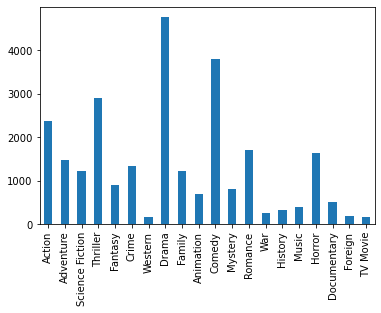

In [111]:
available_genres.plot.bar()

In [112]:
profit_generes = analyse_genere(profit_df)
profit_generes

Action             2384
Adventure          1471
Science Fiction    1229
Thriller           2907
Fantasy             916
Crime              1354
Western             165
Drama              4760
Family             1231
Animation           699
Comedy             3793
Mystery             810
Romance            1712
War                 270
History             334
Music               408
Horror             1637
Documentary         520
Foreign             188
TV Movie            167
dtype: int64

<AxesSubplot:>

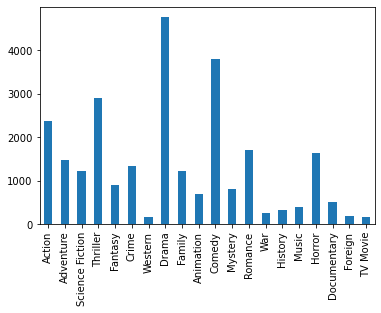

In [113]:
profit_generes.plot.bar()

<a id='conclusions'></a>
## Conclusions


* The most profitable movie is the record in row 1329. The movie was titled Star War and was released in 1977. It had a budget of 11000000 dollars  and generated a revenue of 775398007 dollars. The adjusted profit in 2010 after accounting for inflated was calculated to be $1254446000.


* From the dataset, only 35% of movies were at all profitable while 22% were at loss


* Profitable movies have an average popularity of 1.167055, average runtime of 108.314 and a mean vote_average of 6.24.


* The profitable generes are drama, comedy and thriller.